In [88]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [89]:
(X_train, y_train),(X_test, y_test) = datasets.mnist.load_data()

In [90]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)

(60000, 28, 28, 1)


In [91]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [92]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)              

In [93]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [94]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.3305 - accuracy: 0.8990
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0479 - accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0231 - accuracy: 0.9932
Epoch 5/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0198 - accuracy: 0.9935


In [95]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print("Précision : ", test_acc)

313/313 - 2s - loss: 0.0430 - accuracy: 0.9874
Précision :  0.9873999953269958


In [96]:
probability_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

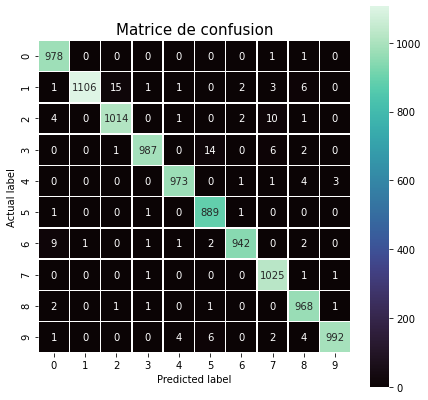

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrice_confusion = confusion_matrix(y_test, predictions)

plt.figure(figsize=(7,7))
sns.heatmap(matrice_confusion, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'mako')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Matrice de confusion", size = 15)
plt.show()

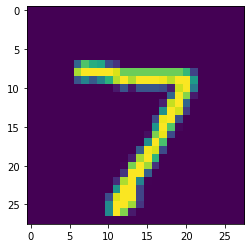

In [98]:
plt.imshow(X_test[0])

In [99]:
print('Prédiction pour la première image des données test : ', predictions[0])

Prédiction pour la première image des données test :  7


**Enregistrement du modèle**

In [100]:
model.save('reco_chiffre')

INFO:tensorflow:Assets written to: reco_chiffre\assets
